### Pragati Agarwal
#### agpragati08@gmail.com

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
train = pd.read_csv('train.csv')
train.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [6]:
# Checking how many unique values each column has and what are they.
column = train.columns
for i in column:
    print(i)
    print('Number of unique values:',train[i].nunique())
    print(train[i].unique())
    print()

Customer ID
Number of unique values: 30000
['C-36995' 'C-33999' 'C-3770' ... 'C-5192' 'C-12172' 'C-33003']

Name
Number of unique values: 30000
['Frederica Shealy' 'America Calderone' 'Rosetta Verne' ... 'Carmelo Lone'
 'Carolann Osby' 'Bridget Garibaldi']

Gender
Number of unique values: 2
['F' 'M' nan]

Age
Number of unique values: 48
[56 32 65 31 60 43 45 38 18 39 48 61 54 64 41 19 44 24 55 63 23 29 28 49
 30 37 51 27 59 62 21 33 58 25 26 50 46 22 36 53 34 40 35 42 57 47 52 20]

Income (USD)
Number of unique values: 24429
[1933.05 4952.91  988.19 ... 1606.88 2417.71 3068.24]

Income Stability
Number of unique values: 2
['Low' 'High' nan]

Profession
Number of unique values: 8
['Working' 'Pensioner' 'State servant' 'Commercial associate' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

Type of Employment
Number of unique values: 18
['Sales staff' nan 'High skill tech staff' 'Secretaries' 'Laborers'
 'Managers' 'Cooking staff' 'Core staff' 'Drivers' 'Realty agents'
 'Security

In [7]:
columns = train.select_dtypes(exclude = 'object').drop(columns = ['Dependents', 'No. of Defaults', 'Property ID', 
                                                                  'Property Type', 'Co-Applicant']).columns
train[columns].describe()
# CO-APPLICANT AND CURRENT LOAN EXPENSES MIN ARE -999 WHICH CAN BE SUBSTITUTED TO 0

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Credit Score,Property Age,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,28297.000000,2.515000e+04,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,739.885381,2.631119e+03,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,72.163846,1.132268e+04,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,580.000000,3.777000e+02,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,681.880000,1.650450e+03,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,739.820000,2.223250e+03,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,799.120000,3.091407e+03,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,896.260000,1.777460e+06,1.077967e+06,481907.320000


In [8]:
train.describe(include = 'object')

,Customer ID,Name,Gender,Income Stability,Profession,Type of Employment,Location,Expense Type 1,Expense Type 2,Has Active Credit Card,Property Location
count,30000,30000,29947,28317,30000,22730,30000,30000,30000,28434,29644
unique,30000,30000,2,2,8,18,3,2,2,3,3
top,C-9122,Danny Teamer,M,Low,Working,Laborers,Semi-Urban,N,Y,Active,Semi-Urban
freq,1,1,15053,25751,16926,5578,21563,19214,20180,9771,10387


In [9]:
# replacing all the entriess '-999' with 'Null'.
train = train.replace(-999, np.nan)
train.isnull().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     349
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                    168
Property Price                  352
Loan Sanction Amount (USD)      678
dtype: int64

In [10]:
# An institution should not discriminate on the basis of gender, checking with values present if that is the case.
import scipy.stats as ss
Gender = train.dropna(subset=['Gender','Loan Sanction Amount (USD)']).groupby('Gender')['Loan Sanction Amount (USD)'].apply(list)
ss.ttest_ind(*Gender)
# As this institution doesn't depend on gender to predict amount os loan to be sanctioned, we can drop Gender column.

Ttest_indResult(statistic=0.43463060818910915, pvalue=0.6638337783592307)

In [11]:
train[columns].corr()
# Loan Sanction Amount is highly correlated with Loan Amount Request, Current Loan Expense and Property Price. 
# Moderately Correlated with Credit Score and least correlated with Age.

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Credit Score,Property Age,Property Price,Loan Sanction Amount (USD)
Age,1.000000,-0.010201,-0.010450,-0.027957,0.129760,-0.010341,-0.010512,0.006890
Income (USD),-0.010201,1.000000,0.050371,0.061066,0.012911,1.000000,0.051191,0.038270
Loan Amount Request (USD),-0.010450,0.050371,1.000000,0.762303,0.178260,0.049976,0.964305,0.735255
Current Loan Expenses (USD),-0.027957,0.061066,0.762303,1.000000,0.123165,0.060580,0.735075,0.554556
Credit Score,0.129760,0.012911,0.178260,0.123165,1.000000,0.012959,0.172595,0.372873
Property Age,-0.010341,1.000000,0.049976,0.060580,0.012959,1.000000,0.050831,0.037909
Property Price,-0.010512,0.051191,0.964305,0.735075,0.172595,0.050831,1.000000,0.710186
Loan Sanction Amount (USD),0.006890,0.038270,0.735255,0.554556,0.372873,0.037909,0.710186,1.000000


In [12]:
# substituting Null with 'na' so that we can analyse how Nulls are working
train.fillna('na').to_csv('train_new.csv')

In [13]:
# dropping customer id and name as it is of no help, Property Age as it is redundant and Gender.
train_mod = train.drop(columns = ['Customer ID','Name','Property Age','Gender'])
# Dropping rows which has Loan Sanction Amount to be null.
train_mod.dropna(subset = ['Loan Sanction Amount (USD)'], inplace = True)

In [14]:
# Dropping rows which has got atleast 4 null columns.
Index = list(np.where(train_mod.isnull().sum(axis = 1) >= 4)[0])

In [15]:
train_mod.drop(train_mod.index[Index], inplace = True)
train_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29215 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          29215 non-null  int64  
 1   Income (USD)                 24896 non-null  float64
 2   Income Stability             27651 non-null  object 
 3   Profession                   29215 non-null  object 
 4   Type of Employment           22176 non-null  object 
 5   Location                     29215 non-null  object 
 6   Loan Amount Request (USD)    29215 non-null  float64
 7   Current Loan Expenses (USD)  28898 non-null  float64
 8   Expense Type 1               29215 non-null  object 
 9   Expense Type 2               29215 non-null  object 
 10  Dependents                   26882 non-null  float64
 11  Credit Score                 27631 non-null  float64
 12  No. of Defaults              29215 non-null  int64  
 13  Has Active Credi

In [16]:
train_mod.duplicated().sum()

0

In [17]:
train_mod = train_mod.fillna('na')
train_mod.head()

,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3,809.44,0,na,746,4,Rural,1,119933,54607.18
1,32,4952.91,Low,Working,na,Semi-Urban,46837.47,495.81,N,Y,1,780.4,0,Unpossessed,608,2,Rural,1,54791,37469.98
2,65,988.19,High,Pensioner,na,Semi-Urban,45593.04,171.95,N,Y,1,833.15,0,Unpossessed,546,2,Urban,0,72440.6,36474.43
3,65,na,High,Pensioner,na,Rural,80057.92,298.54,N,Y,2,832.7,1,Unpossessed,890,2,Semi-Urban,1,121442,56040.54
4,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,na,745.55,1,Active,715,4,Semi-Urban,1,208568,74008.28


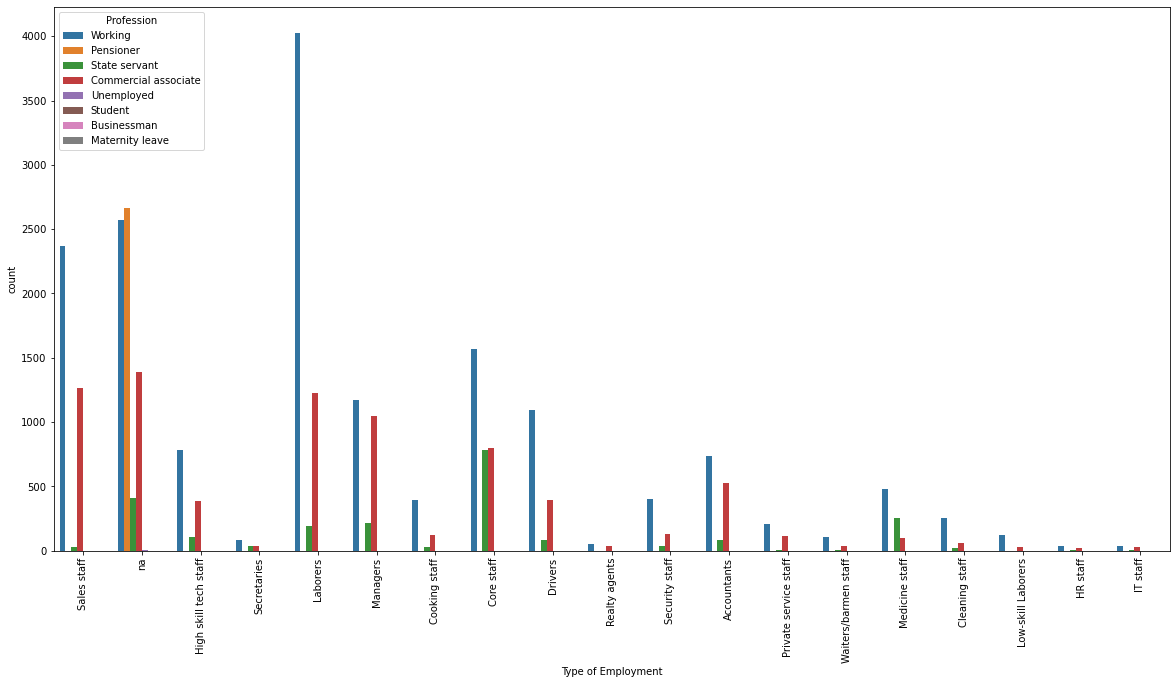

In [18]:
# Number of customers in particular Type of Employment, segregated by Profession.
plt.figure(figsize = (20,10))
sns.countplot('Type of Employment', data = train_mod, hue = 'Profession')
plt.xticks(rotation = 90)
plt.show()

In [19]:
pd.crosstab(train_mod['Profession'],train_mod['Type of Employment']).T
# Profession (Pensioner, Student, Maternity Leave, Unemployed) not in working mode has been given Null Type of Employment, 
# hence we can substitute them with 'Not Working'.
# Profession with nulls can be substituted with 'others'.

Profession,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working
Type of Employment,,,,,,,,
Accountants,0,525,0,0,85,0,0,733
Cleaning staff,0,60,0,0,18,0,0,255
Cooking staff,0,124,0,0,32,0,0,392
Core staff,1,799,0,0,781,0,0,1570
Drivers,0,397,0,0,81,0,0,1091
HR staff,0,24,0,0,8,0,0,38
High skill tech staff,0,387,0,0,108,0,0,785
IT staff,0,30,0,0,5,0,0,40
Laborers,0,1226,0,0,192,0,0,4026


In [20]:
# replacing null values in Dependents, Co-Applicant and Current Loan Expenses by 0.
train_mod['Dependents'] = train_mod['Dependents'].replace('na',0)
train_mod['Co-Applicant'] = train_mod['Co-Applicant'].replace('na',0)
train_mod['Current Loan Expenses (USD)'] = train_mod['Current Loan Expenses (USD)'].replace('na',0)

In [21]:
# function for replacing nulls in Type of Employment wrt Profession
def TOE(x,y):
    a = []
    for i,j in zip(x,y):
        if i in ['Businessman','Commercial associate','State servant','Working']:
            if j == 'na':
                a.append('Others')
            else:
                if j in ['Security staff', 'Waiters/barmen staff', 'Cleaning staff', 'Low-skill Laborers']:
                    a.append('Low skill job')
                elif j in ['Cooking staff', 'Drivers', 'Medicine staff']:
                    a.append('Mid skill job')
                elif j in ['High skill tech staff', 'IT staff']:
                    a.append('IT staff')
                else:
                    a.append(j)
        else:
            a.append('Not Working')
    return a

In [22]:
train_mod['Type of Employment'] = TOE(train_mod['Profession'],train_mod['Type of Employment'])

In [23]:
group = []
Group = train_mod.groupby(['Property ID','Property Type'])
for i,j in Group:
    group.append(i)
    print(i, '\n', j['Property Location'].value_counts())

(1, 1) 
 Urban    32
Name: Property Location, dtype: int64
(2, 3) 
 Urban    21
Name: Property Location, dtype: int64
(3, 1) 
 Urban    27
na        1
Name: Property Location, dtype: int64
(4, 3) 
 Semi-Urban    31
na             1
Name: Property Location, dtype: int64
(5, 1) 
 Semi-Urban    29
na             1
Name: Property Location, dtype: int64
(6, 2) 
 Rural    30
Name: Property Location, dtype: int64
(7, 1) 
 Rural    24
Name: Property Location, dtype: int64
(8, 4) 
 Rural    33
Name: Property Location, dtype: int64
(9, 4) 
 Rural    25
Name: Property Location, dtype: int64
(10, 3) 
 Semi-Urban    28
Name: Property Location, dtype: int64
(11, 3) 
 Semi-Urban    28
Name: Property Location, dtype: int64
(12, 4) 
 Rural    24
na        3
Name: Property Location, dtype: int64
(13, 1) 
 Semi-Urban    18
Name: Property Location, dtype: int64
(14, 4) 
 Rural    25
Name: Property Location, dtype: int64
(15, 3) 
 Semi-Urban    37
na             1
Name: Property Location, dtype: int64
(16,

(154, 1) 
 Rural    24
Name: Property Location, dtype: int64
(155, 4) 
 Semi-Urban    23
Name: Property Location, dtype: int64
(156, 1) 
 Rural    25
na        1
Name: Property Location, dtype: int64
(157, 2) 
 Rural    22
na        1
Name: Property Location, dtype: int64
(158, 4) 
 Rural    20
na        1
Name: Property Location, dtype: int64
(159, 3) 
 Rural    33
Name: Property Location, dtype: int64
(160, 1) 
 Urban    42
Name: Property Location, dtype: int64
(161, 2) 
 Semi-Urban    27
na             1
Name: Property Location, dtype: int64
(162, 2) 
 Rural    30
Name: Property Location, dtype: int64
(163, 3) 
 Semi-Urban    31
Name: Property Location, dtype: int64
(164, 1) 
 Rural    17
na        2
Name: Property Location, dtype: int64
(165, 3) 
 Rural    32
Name: Property Location, dtype: int64
(166, 2) 
 Rural    26
Name: Property Location, dtype: int64
(167, 3) 
 Rural    33
Name: Property Location, dtype: int64
(168, 3) 
 Rural    26
Name: Property Location, dtype: int64
(169,

(296, 2) 
 Semi-Urban    22
Name: Property Location, dtype: int64
(297, 2) 
 Semi-Urban    29
Name: Property Location, dtype: int64
(298, 1) 
 Semi-Urban    29
Name: Property Location, dtype: int64
(299, 2) 
 Semi-Urban    15
Name: Property Location, dtype: int64
(300, 4) 
 Urban    23
Name: Property Location, dtype: int64
(301, 1) 
 Semi-Urban    30
Name: Property Location, dtype: int64
(302, 4) 
 Rural    18
na        1
Name: Property Location, dtype: int64
(303, 4) 
 Urban    26
Name: Property Location, dtype: int64
(304, 3) 
 Rural    36
Name: Property Location, dtype: int64
(305, 2) 
 Semi-Urban    34
Name: Property Location, dtype: int64
(306, 1) 
 Semi-Urban    18
Name: Property Location, dtype: int64
(307, 1) 
 Semi-Urban    29
na             1
Name: Property Location, dtype: int64
(308, 4) 
 Semi-Urban    32
Name: Property Location, dtype: int64
(309, 1) 
 Semi-Urban    24
Name: Property Location, dtype: int64
(310, 4) 
 Rural    26
Name: Property Location, dtype: int64
(311, 

(449, 2) 
 Semi-Urban    29
na             1
Name: Property Location, dtype: int64
(450, 3) 
 Semi-Urban    39
Name: Property Location, dtype: int64
(451, 2) 
 Urban    33
na        1
Name: Property Location, dtype: int64
(452, 1) 
 Semi-Urban    30
na             1
Name: Property Location, dtype: int64
(453, 1) 
 Rural    29
Name: Property Location, dtype: int64
(454, 3) 
 Rural    40
na        1
Name: Property Location, dtype: int64
(455, 4) 
 Semi-Urban    26
na             1
Name: Property Location, dtype: int64
(456, 3) 
 Rural    32
Name: Property Location, dtype: int64
(457, 2) 
 Rural    36
Name: Property Location, dtype: int64
(458, 1) 
 Urban    32
Name: Property Location, dtype: int64
(459, 1) 
 Semi-Urban    29
Name: Property Location, dtype: int64
(460, 4) 
 Rural    27
na        1
Name: Property Location, dtype: int64
(461, 4) 
 Rural    31
Name: Property Location, dtype: int64
(462, 3) 
 Semi-Urban    29
Name: Property Location, dtype: int64
(463, 1) 
 Urban    27
na    

(600, 4) 
 Semi-Urban    27
Name: Property Location, dtype: int64
(601, 3) 
 Urban    28
Name: Property Location, dtype: int64
(602, 4) 
 Semi-Urban    20
na             1
Name: Property Location, dtype: int64
(603, 2) 
 Rural    26
Name: Property Location, dtype: int64
(604, 1) 
 Semi-Urban    32
na             2
Name: Property Location, dtype: int64
(605, 2) 
 Semi-Urban    33
na             1
Name: Property Location, dtype: int64
(606, 3) 
 Urban    29
na        1
Name: Property Location, dtype: int64
(607, 3) 
 Urban    23
na        1
Name: Property Location, dtype: int64
(608, 2) 
 Rural    27
Name: Property Location, dtype: int64
(609, 1) 
 Urban    31
Name: Property Location, dtype: int64
(610, 1) 
 Rural    26
Name: Property Location, dtype: int64
(611, 1) 
 Semi-Urban    33
Name: Property Location, dtype: int64
(612, 3) 
 Rural    21
Name: Property Location, dtype: int64
(613, 3) 
 Urban    23
Name: Property Location, dtype: int64
(614, 4) 
 Semi-Urban    42
na             1
N

 Rural    31
na        1
Name: Property Location, dtype: int64
(744, 4) 
 Semi-Urban    32
Name: Property Location, dtype: int64
(745, 4) 
 Semi-Urban    29
Name: Property Location, dtype: int64
(746, 4) 
 Rural    23
na        1
Name: Property Location, dtype: int64
(747, 2) 
 Urban    31
Name: Property Location, dtype: int64
(748, 4) 
 Semi-Urban    31
na             1
Name: Property Location, dtype: int64
(749, 4) 
 Rural    27
Name: Property Location, dtype: int64
(750, 2) 
 Urban    32
Name: Property Location, dtype: int64
(751, 3) 
 Urban    30
Name: Property Location, dtype: int64
(752, 3) 
 Semi-Urban    31
Name: Property Location, dtype: int64
(753, 3) 
 Rural    31
Name: Property Location, dtype: int64
(754, 4) 
 Semi-Urban    28
Name: Property Location, dtype: int64
(755, 3) 
 Semi-Urban    28
na             2
Name: Property Location, dtype: int64
(756, 3) 
 Rural    20
na        1
Name: Property Location, dtype: int64
(757, 3) 
 Rural    31
Name: Property Location, dtype: i

(894, 4) 
 Semi-Urban    29
Name: Property Location, dtype: int64
(895, 1) 
 Rural    24
na        1
Name: Property Location, dtype: int64
(896, 2) 
 Rural    34
Name: Property Location, dtype: int64
(897, 1) 
 Semi-Urban    28
Name: Property Location, dtype: int64
(898, 4) 
 Urban    27
Name: Property Location, dtype: int64
(899, 1) 
 Urban    21
na        1
Name: Property Location, dtype: int64
(900, 1) 
 Semi-Urban    27
na             1
Name: Property Location, dtype: int64
(901, 1) 
 Urban    38
Name: Property Location, dtype: int64
(902, 1) 
 Semi-Urban    22
Name: Property Location, dtype: int64
(903, 4) 
 Semi-Urban    29
na             1
Name: Property Location, dtype: int64
(904, 1) 
 Rural    30
Name: Property Location, dtype: int64
(905, 2) 
 Semi-Urban    36
na             1
Name: Property Location, dtype: int64
(906, 2) 
 Urban    27
na        1
Name: Property Location, dtype: int64
(907, 1) 
 Rural    31
na        1
Name: Property Location, dtype: int64
(908, 3) 
 Semi-U

In [24]:
for i in group:
    train_mod['Property Location'] = np.where((train_mod['Property ID']==i[0]) & (train_mod['Property Type']==i[1]) &
                                              (train_mod['Property Location']=='na'),
                                               Group.get_group(i)['Property Location'].value_counts().index[0],
                                               train_mod['Property Location'])

In [25]:
income = pd.crosstab(train_mod['Income Stability'], train_mod['Profession'])

<Figure size 1440x1440 with 0 Axes>

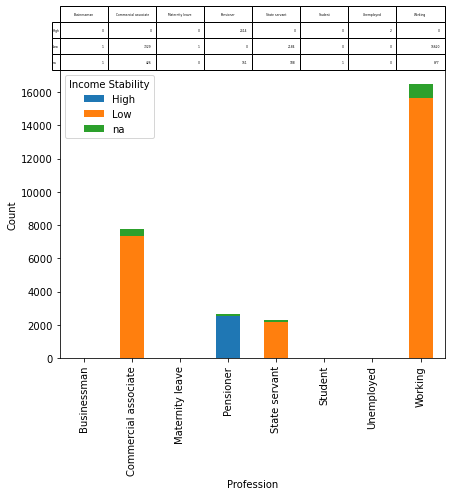

In [26]:
plt.figure(figsize = (20,20))
(income.T).plot(kind = 'bar', stacked = True)
plt.table(cellText = income.values,
                     rowLabels=list(income.index),
                     colLabels=list(income.columns),
                     loc='top')

plt.subplots_adjust(left=0.01, bottom=0.00001, top=1.0)

plt.ylabel("Count")
plt.show()
# Pensioner and unemployed has got high income stability while others are marked as low. Hence we'Ll replace 'na' accordingly.

In [27]:
train_mod['Income Stability'] = np.where(((train_mod['Profession']=='Pensioner')|
                                         (train_mod['Profession']=='Unemployed')) &
                                         (train_mod['Income Stability']=='na'),'High','Low')

In [28]:
def Profession(x):
    a = []
    for i in x:
        if i in ['Student','Unemployed','Maternity leave', 'Pensioner']:
            a.append('Not Working')
        elif i == 'Businessman':
            a.append('Commercial associate')
        else:
            a.append(i)
    return a       

In [29]:
train_mod['Profession'] = Profession(train_mod['Profession'])

In [30]:
income_null = list((np.where(train_mod['Income (USD)']=='na'))[0])

In [31]:
max = train_mod.drop(train_mod.index[income_null])['Income (USD)'].max()      
train_mod['Income (USD)'] = train_mod['Income (USD)'].replace(max, round((max/100),2))

In [32]:
# Grouping by Profession and Type of Employment so as to impute null values in Income column by their repective averages.
Group2 = train_mod.drop(train_mod.index[income_null]).groupby(['Profession', 'Type of Employment'])
group2 = []
group2_income = []
for i,j in Group2:
    group2.append(i)
    group2_income.append(Group2.get_group(i)['Income (USD)'].mean())

In [33]:
for j,i in enumerate(group2):
    train_mod['Income (USD)'] = np.where((train_mod['Profession']==i[0]) & (train_mod['Type of Employment']==i[1]) &
                                              (train_mod['Income (USD)']=='na'),
                                               group2_income[j],
                                               train_mod['Income (USD)'])    

In [34]:
# Dependents of more than 5 are combined as 5.
train_mod['Dependents'] = np.where(train_mod['Dependents']>5,5,train_mod['Dependents'])

In [35]:
price_null = list((np.where(train_mod['Property Price']=='na'))[0])

In [36]:
# Grouping by Property Type & Location so as to impute Property Price null values by respective averages.
Group3 = train_mod.drop(train_mod.index[price_null]).groupby(['Property Type', 'Property Location'])
group3 = []
group3_price = []
for i,j in Group3:
    group3.append(i)
    group3_price.append(Group3.get_group(i)['Property Price'].mean())

In [37]:
for j,i in enumerate(group3):
    train_mod['Property Price'] = np.where((train_mod['Property Type']==i[0]) & (train_mod['Property Location']==i[1]) &
                                              (train_mod['Property Price']=='na'),
                                               group3_price[j],
                                               train_mod['Property Price'])    

In [38]:
card_null = list((np.where(train_mod['Has Active Credit Card']=='na'))[0])

In [39]:
# Grouping by Profession & Type of Employment to impute null values in Has Active Credit Card column.
Group5 = train_mod.drop(train_mod.index[card_null]).groupby(['Profession', 'Type of Employment'])
group5 = []
group5_card = []
for i,j in Group5:
    group5.append(i)
    group5_card.append(Group5.get_group(i)['Has Active Credit Card'].mode().values[0])

In [40]:
for j,i in enumerate(group5):
    train_mod['Has Active Credit Card'] = np.where(((train_mod['Profession']==i[0]) & (train_mod['Type of Employment']==i[1]) &
                                          (train_mod['Has Active Credit Card']=='na')),
                                           group5_card[j],
                                           train_mod['Has Active Credit Card'])    

In [41]:
train_mod['Loan Group'] = np.where(train_mod['Current Loan Expenses (USD)']==0, '0' , 'Not 0')

In [42]:
credit_null = list((np.where(train_mod['Credit Score']=='na'))[0])

In [43]:
# Creating group to impute null values by respective average credit score.
Group4 = train_mod.drop(train_mod.index[credit_null]).groupby(['Profession', 'Type of Employment', 'Loan Group', 
                                                               'No. of Defaults','Has Active Credit Card'])
group4 = []
group4_credit = []
for i,j in Group4:
    group4.append(i)
    group4_credit.append(round(Group4.get_group(i)['Credit Score'].mean(),2))

In [44]:
for j,i in enumerate(group4):
    train_mod['Credit Score'] = np.where(((train_mod['Profession']==i[0]) & (train_mod['Type of Employment']==i[1]) &
                                          (train_mod['Loan Group']==i[2]) & (train_mod['No. of Defaults']==i[3]) & 
                                          (train_mod['Has Active Credit Card']) & (train_mod['Credit Score']=='na')),
                                           group4_credit[j],
                                           train_mod['Credit Score'])    

In [45]:
# Creating groups out of credit score.
def Credit_Group(x):
    a = []
    for i in x:
        if isinstance(i, str) is False:
            if i < 580:
                a.append('Poor')
            elif i < 650:
                a.append('Fair')
            elif i < 730:
                a.append('Good')
            elif i < 800:
                a.append('Very Good')
            else:
                a.append('Excellent')
        else:
            a.append('No History')
    return a        

In [46]:
train_mod['Credit Group'] = Credit_Group(train_mod['Credit Score'])

In [47]:
train_mod['Credit Score'].replace('na', 0, inplace = True)

In [48]:
train_mod['Income (USD)'] = train_mod['Income (USD)'].astype('float')
train_mod['Credit Score'] = train_mod['Credit Score'].astype('float')
train_mod['Property Price'] = train_mod['Property Price'].astype('float')

In [49]:
train_mod.drop(columns = ['Loan Group'], inplace = True)

In [50]:
train_mod = train_mod.replace('na',np.nan)

In [51]:
train_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29215 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          29215 non-null  int64  
 1   Income (USD)                 29215 non-null  float64
 2   Income Stability             29215 non-null  object 
 3   Profession                   29215 non-null  object 
 4   Type of Employment           29215 non-null  object 
 5   Location                     29215 non-null  object 
 6   Loan Amount Request (USD)    29215 non-null  float64
 7   Current Loan Expenses (USD)  29215 non-null  float64
 8   Expense Type 1               29215 non-null  object 
 9   Expense Type 2               29215 non-null  object 
 10  Dependents                   29215 non-null  float64
 11  Credit Score                 29215 non-null  float64
 12  No. of Defaults              29215 non-null  int64  
 13  Has Active Credi

## Testing if individual columns are statistically significant.

In [52]:
ss.pearsonr(train_mod['Age'], train_mod['Loan Sanction Amount (USD)'])
# Age is not statistically significant enough to be related to Loan Sanction Amount.

(0.0064834246214900285, 0.2678027234960831)

In [53]:
ss.pearsonr(train_mod['Income (USD)'], train_mod['Loan Sanction Amount (USD)'])
# Given the p-value to be extremely low signifies Income is statistically significant.

(0.22555136353886604, 0.0)

In [54]:
Stability = train_mod.groupby('Income Stability')['Loan Sanction Amount (USD)']
ss.ttest_ind(Stability.get_group('High'), Stability.get_group('Low'))
# Loan Sanction Amount statistically significantly differs over Income Stability

Ttest_indResult(statistic=4.75731362286562, pvalue=1.971227261997523e-06)

In [55]:
Prof = train_mod.groupby('Profession')['Loan Sanction Amount (USD)'].apply(list)
ss.f_oneway(*Prof)
# Loan Sanction Amount statistically significantly differs over Profession

F_onewayResult(statistic=103.4145703073859, pvalue=1.3601167808807903e-66)

In [56]:
Employment = train_mod.groupby('Type of Employment')['Loan Sanction Amount (USD)'].apply(list)
ss.f_oneway(*Employment)
# Loan Sanction Amount statistically significantly differs over Type of Employment

F_onewayResult(statistic=69.2233175382515, pvalue=4.033256980195294e-181)

In [57]:
Location = train_mod.groupby('Location')['Loan Sanction Amount (USD)'].apply(list)
ss.f_oneway(*Location)
# Loan Sanction Amount statistically significantly differs over Location of cutomer

F_onewayResult(statistic=241.66781741315435, pvalue=8.013492983866e-105)

In [58]:
ss.pearsonr(train_mod['Loan Amount Request (USD)'], train_mod['Loan Sanction Amount (USD)'])
# # Loan Sanction Amount is highly correlated to Loan Amount Requested, their relationship is statistically significant. 

(0.7344346862020039, 0.0)

In [59]:
ss.pearsonr(train_mod['Current Loan Expenses (USD)'], train_mod['Loan Sanction Amount (USD)'])
# Relationship between Current Loan Expenses and Loan Saction Amount is statistically significant.

(0.5376297768994698, 0.0)

In [60]:
Expense1 = train_mod.groupby('Expense Type 1')['Loan Sanction Amount (USD)'].apply(list)
ss.ttest_ind(*Expense1)
# Loan Sanction Amount statistically significantly differs over two categories of Expense Type1.

Ttest_indResult(statistic=-9.710955391308103, pvalue=2.926206600044479e-22)

In [61]:
Expense2 = train_mod.groupby('Expense Type 2')['Loan Sanction Amount (USD)'].apply(list)
ss.ttest_ind(*Expense2)
# Loan Sanction Amount statistically significantly does not differs over two categories of Expense Type2.

Ttest_indResult(statistic=-1.6642445262589338, pvalue=0.09607429815361716)

In [62]:
Dependents = train_mod.groupby('Dependents')['Loan Sanction Amount (USD)'].apply(list)
ss.f_oneway(*Dependents)
# Loan Sanction Amount statistically significantly differs over categories of Dependents.

F_onewayResult(statistic=67.98902937624491, pvalue=6.704759930795374e-71)

In [63]:
ss.pearsonr(train_mod['Credit Score'], train_mod['Loan Sanction Amount (USD)'])

(0.3630803377797941, 0.0)

In [64]:
Credit = train_mod.groupby('Credit Group')['Loan Sanction Amount (USD)'].apply(list)
ss.f_oneway(*Credit)
# Loan Sanction Amount statistically significantly differs over Credit Groups.

F_onewayResult(statistic=1411.8270302801632, pvalue=0.0)

In [65]:
Defaults = train_mod.groupby('No. of Defaults')['Loan Sanction Amount (USD)'].apply(list)
ss.ttest_ind(*Defaults)
# we have enough evidence to establish statistically that Loan Sanction Amount does not differs over categories of 
# No of Defaults significantly.

Ttest_indResult(statistic=0.6928112060963776, pvalue=0.4884335461685049)

In [66]:
Card = train_mod.groupby('Has Active Credit Card')['Loan Sanction Amount (USD)'].apply(list)
ss.f_oneway(*Card)
# we have enough evidence to establish statistically that Loan Sanction Amount does not differs over categories of 
# Credit Card Status significantly.

F_onewayResult(statistic=1.062314224346544, pvalue=0.3456683137667225)

In [67]:
Id = train_mod.groupby('Property ID')['Loan Sanction Amount (USD)'].apply(list)
ss.f_oneway(*Id)
# we have enough evidence to establish statistically that Loan Sanction Amount does not differs over categories of 
# Property ID significantly.

F_onewayResult(statistic=1.0512271176216772, pvalue=0.13148631503873756)

In [68]:
Type = train_mod.groupby('Property Type')['Loan Sanction Amount (USD)'].apply(list)
ss.f_oneway(*Type)
# we have enough evidence to establish statistically that Loan Sanction Amount does not differs over categories of 
# Property Type significantly.

F_onewayResult(statistic=0.7025450312800173, pvalue=0.5503777444157233)

In [69]:
Property = train_mod.groupby('Property Location')['Loan Sanction Amount (USD)'].apply(list)
ss.f_oneway(*Property)
# we have enough evidence to establish statistically that Loan Sanction Amount does not differs over categories of 
# Property Location significantly.

F_onewayResult(statistic=1.178181062658653, pvalue=0.30785279557526796)

In [70]:
Applicant = train_mod.groupby('Co-Applicant')['Loan Sanction Amount (USD)'].apply(list)
ss.ttest_ind(*Applicant)
# we have enough evidence to establish statistically that having co-applicant or not does influence 
# amout of loan to be sanctioned.

Ttest_indResult(statistic=-46.35193978963209, pvalue=0.0)

In [71]:
ss.pearsonr(train_mod['Property Price'], train_mod['Loan Sanction Amount (USD)'])
# Property price significantly influences loan sanction amount, speaking statistically

(0.7060381234973208, 0.0)

In [277]:
# dropping columns that were not statistically significant enough to predict Loan Sanction Amount.
train_new = train_mod.drop(columns = ['Age', 'Expense Type 2', 'No. of Defaults', 'Has Active Credit Card', 
                                      'Property ID', 'Property Type', 'Property Location'])
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29215 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Income (USD)                 29215 non-null  float64
 1   Income Stability             29215 non-null  object 
 2   Profession                   29215 non-null  object 
 3   Type of Employment           29215 non-null  object 
 4   Location                     29215 non-null  object 
 5   Loan Amount Request (USD)    29215 non-null  float64
 6   Current Loan Expenses (USD)  29215 non-null  float64
 7   Expense Type 1               29215 non-null  object 
 8   Dependents                   29215 non-null  float64
 9   Credit Score                 29215 non-null  float64
 10  Co-Applicant                 29215 non-null  float64
 11  Property Price               29215 non-null  float64
 12  Loan Sanction Amount (USD)   29215 non-null  float64
 13  Credit Group    

## Building ML model

In [278]:
from sklearn.preprocessing import LabelEncoder
labelr = LabelEncoder()

In [279]:
cat_col = train_new.select_dtypes(include = 'object').columns.to_list()

In [280]:
for i in cat_col:
    train_new[i] = labelr.fit_transform(train_new[i])

In [281]:
train_new.head()

,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Dependents,Credit Score,Co-Applicant,Property Price,Loan Sanction Amount (USD),Credit Group
0,1933.05000,1,3,12,1,72809.58,241.08,0,3.0,809.44,1.0,119933.46,54607.18,0
1,4952.91000,1,3,9,1,46837.47,495.81,0,1.0,780.40,1.0,54791.00,37469.98,4
2,988.19000,1,1,8,1,45593.04,171.95,0,1.0,833.15,0.0,72440.58,36474.43,0
3,2148.74974,1,1,8,0,80057.92,298.54,0,2.0,832.70,1.0,121441.51,56040.54,0
4,2614.77000,1,3,3,1,113858.89,491.41,0,0.0,745.55,1.0,208567.91,74008.28,4


In [333]:
x = train_new.drop(columns = ['Loan Sanction Amount (USD)'])
y = train_new['Loan Sanction Amount (USD)']

In [283]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x, y, test_size = 0.3, random_state = 25)

In [284]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(xtrain, ytrain)

In [285]:
y_pred = lr.predict(xtest)
from sklearn.metrics import r2_score
r2_score(ytest, y_pred)*100

67.13140369804282

## importing test data

In [286]:
test = pd.read_csv('test.csv')
test.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,396.72,N,N,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,463.76,Y,Y,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,493.15,N,Y,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,446.15,N,Y,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,370.10,N,N,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908.0


In [287]:
test.info()
# co-applicant and property price are displaying object data type, let's dig into it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  20000 non-null  object 
 1   Name                         20000 non-null  object 
 2   Gender                       19969 non-null  object 
 3   Age                          20000 non-null  int64  
 4   Income (USD)                 19250 non-null  float64
 5   Income Stability             19187 non-null  object 
 6   Profession                   20000 non-null  object 
 7   Type of Employment           15311 non-null  object 
 8   Location                     20000 non-null  object 
 9   Loan Amount Request (USD)    20000 non-null  float64
 10  Current Loan Expenses (USD)  19917 non-null  float64
 11  Expense Type 1               20000 non-null  object 
 12  Expense Type 2               20000 non-null  object 
 13  Dependents      

In [288]:
test['Co-Applicant'].unique()

array(['1', '0', '?'], dtype=object)

In [289]:
for i in test_mod.columns:
    print(i)
    print(test_mod[i].nunique())
    print(test_mod[i].unique())
    print()

Age
48
[47 57 52 65 60 59 43 64 27 29 53 36 37 19 32 38 54 44 49 18 61 56 51 63
 35 41 50 23 58 24 26 31 39 21 45 55 62 20 25 22 34 33 40 48 30 42 46 28]

Income (USD)
18728
[3472.69 1184.84 1266.27 ... 2019.78 2252.03 5233.16]

Income Stability
2
['Low' 'High']

Profession
4
['Commercial associate' 'Working' 'Not Working' 'State servant']

Type of Employment
14
['Managers' 'Sales staff' 'Others' 'Not Working' 'Laborers' 'Core staff'
 'Mid skill job' 'Accountants' 'IT staff' 'Secretaries' 'Low skill job'
 'Realty agents' 'Private service staff' 'HR staff']

Location
3
['Semi-Urban' 'Rural' 'Urban']

Loan Amount Request (USD)
19988
[137088.98 104771.59 176684.91 ...  18629.88  95430.73 107966.03]

Current Loan Expenses (USD)
17248
[396.72 463.76 493.15 ... 332.91 243.02 983.45]

Expense Type 1
2
['N' 'Y']

Dependents
6
[2. 3. 0. 1. 4. 5.]

Credit Score
13782
[799.14 833.31 627.44 ... 656.46 865.46 857.16]

No. of Defaults
2
[0 1]

Has Active Credit Card
3
['Unpossessed' 'Inactive' 'Acti

In [290]:
# replacing all the entriess '-999' with 'Null'.
test = test.replace(-999, np.nan)
test['Co-Applicant'] = test['Co-Applicant'].replace('?',np.nan)
test['Property Price'] = test['Property Price'].replace('?',np.nan)
test.isnull().sum()

Customer ID                       0
Name                              0
Gender                           31
Age                               0
Income (USD)                    750
Income Stability                813
Profession                        0
Type of Employment             4689
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Property ID                       0
Property Age                    892
Property Type                     0
Property Location               160
Co-Applicant                     77
Property Price                  168
dtype: int64

In [291]:
# dropping customer id and name as it is of no help, Property Age as it is redundant and Gender.
test_mod = test.drop(columns = ['Customer ID','Name','Property Age','Gender','Expense Type 2'])

In [292]:
test_mod = test_mod.fillna('na')
test_mod.head()

,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Type,Property Location,Co-Applicant,Property Price
0,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,396.72,N,2,799.14,0,Unpossessed,843,2,Urban,1,236644.5
1,57,1184.84,Low,Working,Sales staff,Rural,104771.59,463.76,Y,2,833.31,0,Unpossessed,22,1,Rural,1,142357.3
2,52,1266.27,Low,Working,na,Semi-Urban,176684.91,493.15,N,3,627.44,0,Unpossessed,1,1,Urban,1,300991.24
3,65,1369.72,High,Pensioner,na,Rural,97009.18,446.15,N,2,833.2,0,Inactive,730,1,Semi-Urban,0,125612.1
4,60,1939.23,High,Pensioner,na,Urban,109980.00,370.1,N,na,na,0,na,356,4,Semi-Urban,1,180908.0


In [293]:
test_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          20000 non-null  int64  
 1   Income (USD)                 20000 non-null  object 
 2   Income Stability             20000 non-null  object 
 3   Profession                   20000 non-null  object 
 4   Type of Employment           20000 non-null  object 
 5   Location                     20000 non-null  object 
 6   Loan Amount Request (USD)    20000 non-null  float64
 7   Current Loan Expenses (USD)  20000 non-null  object 
 8   Expense Type 1               20000 non-null  object 
 9   Dependents                   20000 non-null  object 
 10  Credit Score                 20000 non-null  object 
 11  No. of Defaults              20000 non-null  int64  
 12  Has Active Credit Card       20000 non-null  object 
 13  Property ID     

In [294]:
# replacing null values in Dependents, Co-Applicant and Current Loan Expenses by 0.
test_mod['Dependents'] = test_mod['Dependents'].replace('na',0)
test_mod['Co-Applicant'] = test_mod['Co-Applicant'].replace('na',0)
test_mod['Current Loan Expenses (USD)'] = test_mod['Current Loan Expenses (USD)'].replace('na',0)

In [295]:
test_mod['Type of Employment'] = TOE(test_mod['Profession'],test_mod['Type of Employment'])

In [296]:
for i in group:
    test_mod['Property Location'] = np.where((test_mod['Property ID']==i[0]) & (test_mod['Property Type']==i[1]) &
                                              (test_mod['Property Location']=='na'),
                                               Group.get_group(i)['Property Location'].value_counts().index[0],
                                               test_mod['Property Location'])

In [297]:
test_mod['Income Stability'] = np.where(((test_mod['Profession']=='Pensioner')|
                                         (test_mod['Profession']=='Unemployed')) &
                                         (test_mod['Income Stability']=='na'),'High','Low')

In [298]:
test_mod['Profession'] = Profession(test_mod['Profession'])

In [299]:
for j,i in enumerate(group2):
    test_mod['Income (USD)'] = np.where((test_mod['Profession']==i[0]) & (test_mod['Type of Employment']==i[1]) &
                                              (test_mod['Income (USD)']=='na'),
                                               group2_income[j],
                                               test_mod['Income (USD)'])    

In [300]:
# Dependents of more than 5 are combined as 5.
test_mod['Dependents'] = np.where(test_mod['Dependents']>5,5,test_mod['Dependents'])

In [301]:
for j,i in enumerate(group3):
    test_mod['Property Price'] = np.where((test_mod['Property Type']==i[0]) & (test_mod['Property Location']==i[1]) &
                                              (test_mod['Property Price']=='na'),
                                               group3_price[j],
                                               test_mod['Property Price'])    

In [302]:
for j,i in enumerate(group5):
    test_mod['Has Active Credit Card'] = np.where(((test_mod['Profession']==i[0]) & (test_mod['Type of Employment']==i[1]) &
                                          (test_mod['Has Active Credit Card']=='na')),
                                           group5_card[j],
                                           test_mod['Has Active Credit Card'])    

In [303]:
test_mod['Loan Group'] = np.where(test_mod['Current Loan Expenses (USD)']==0, '0' , 'Not 0')

In [304]:
for j,i in enumerate(group4):
    test_mod['Credit Score'] = np.where(((test_mod['Profession']==i[0]) & (test_mod['Type of Employment']==i[1]) &
                                          (test_mod['Loan Group']==i[2]) & (test_mod['No. of Defaults']==i[3]) & 
                                          (test_mod['Has Active Credit Card']) & (test_mod['Credit Score']=='na')),
                                           group4_credit[j],
                                           test_mod['Credit Score'])    

In [305]:
test_mod['Credit Group'] = Credit_Group(test_mod['Credit Score'])

In [306]:
test_mod = test_mod.replace('na',np.nan)

In [317]:
test_mod['Income (USD)'] = test_mod['Income (USD)'].astype('float')
test_mod['Credit Score'] = test_mod['Credit Score'].astype('float')
test_mod['Property Price'] = test_mod['Property Price'].astype('float')
test_mod['Co-Applicant'] = test_mod['Co-Applicant'].astype('float')

In [320]:
# dropping columns that were not statistically significant enough to predict Loan Sanction Amount.
test_new = test_mod.drop(columns = ['Age', 'No. of Defaults', 'Has Active Credit Card', 'Loan Group', 
                                      'Property ID', 'Property Type', 'Property Location'])
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Income (USD)                 20000 non-null  float64
 1   Income Stability             20000 non-null  object 
 2   Profession                   20000 non-null  object 
 3   Type of Employment           20000 non-null  object 
 4   Location                     20000 non-null  object 
 5   Loan Amount Request (USD)    20000 non-null  float64
 6   Current Loan Expenses (USD)  20000 non-null  float64
 7   Expense Type 1               20000 non-null  object 
 8   Dependents                   20000 non-null  float64
 9   Credit Score                 20000 non-null  float64
 10  Co-Applicant                 20000 non-null  float64
 11  Property Price               20000 non-null  float64
 12  Credit Group                 20000 non-null  object 
dtypes: float64(7), o

In [321]:
from sklearn.preprocessing import LabelEncoder
labelr = LabelEncoder()
cat_col = test_new.select_dtypes(include = 'object').columns
for i in cat_col:
    test_new[i] = labelr.fit_transform(test_new[i])
test_new.head()

,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Dependents,Credit Score,Co-Applicant,Property Price,Credit Group
0,3472.69,1,0,6,1,137088.98,396.72,0,2.0,799.14,1.0,236644.50,3
1,1184.84,1,3,12,0,104771.59,463.76,1,2.0,833.31,1.0,142357.30,0
2,1266.27,1,3,9,1,176684.91,493.15,0,3.0,627.44,1.0,300991.24,1
3,1369.72,1,1,8,0,97009.18,446.15,0,2.0,833.20,0.0,125612.10,0
4,1939.23,1,1,8,2,109980.00,370.10,0,0.0,806.31,1.0,180908.00,0


In [340]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
test_scaled = sc.fit_transform(test_new)

In [322]:
#fitting model- Linear Regression
model = lr.fit(x_scaled, y)
predicted = model.predict(test_scaled)

In [323]:
predicted = np.where(predicted<0,0,predicted)

In [324]:
final = pd.DataFrame(test[test.columns[0]])
final['Loan Sanction Amount (USD)'] = predicted
final.head()

,Customer ID,Loan Sanction Amount (USD)
0,C-26247,92245.515026
1,C-35067,74435.814095
2,C-34590,82017.706427
3,C-16668,38579.289209
4,C-12196,76448.371589


In [325]:
final.shape

(20000, 2)

In [326]:
final.to_csv('submissionlr.csv', index = False)

In [328]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [330]:
knn = KNeighborsRegressor()
# defining knn parameters to be passed to grid search
knn_params = {'n_neighbors': np.arange(3,20), 'weights':['uniform', 'distance']}

In [342]:
GS = GridSearchCV(knn, knn_params, cv = 3, scoring = 'neg_mean_squared_error')
GS.fit(x_scaled, y)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [343]:
GS.best_params_

{'n_neighbors': 19, 'weights': 'distance'}

In [345]:
#fitting model- K Nearest Neighbors
knn = KNeighborsRegressor(n_neighbors= 19, weights= 'distance')
knn.fit(x_scaled,y)

KNeighborsRegressor(n_neighbors=19, weights='distance')

In [347]:
predicted = knn.predict(test_scaled)
predicted = np.where(predicted<0,0,predicted)

In [349]:
final = pd.DataFrame(test[test.columns[0]])
final['Loan Sanction Amount (USD)'] = predicted
final.head()

,Customer ID,Loan Sanction Amount (USD)
0,C-26247,93097.936899
1,C-35067,62693.338735
2,C-34590,53686.371412
3,C-16668,40883.286226
4,C-12196,85109.043121


In [350]:
final.to_csv('submissionknn.csv', index = False)

In [499]:
dt = DecisionTreeRegressor(random_state = 25)
# defining parameters to be passed for Grid Search for Decision Tree
dt_params = {'max_depth': np.arange(5,50), 'min_samples_leaf':np.arange(2,15)}

In [63]:
GS_dt = GridSearchCV(dt, dt_params, cv = 3, scoring = 'neg_mean_squared_error')
GS_dt.fit(x_scaled, y)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='neg_mean_squared_error')

In [64]:
GS_dt.best_params_

{'max_depth': 7, 'min_samples_leaf': 8}

In [65]:
#fitting model- Decision Tree
dt = DecisionTreeRegressor(max_depth= 7, min_samples_leaf= 8, random_state = 25)
dt.fit(x_scaled,y)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=8, random_state=25)

In [88]:
predicted = dt.predict(test_scaled)
predicted = np.where(predicted<0,0,predicted)

In [89]:
final = pd.DataFrame(test[test.columns[0]])
final['Loan Sanction Amount (USD)'] = predicted
final.head()

,Customer ID,Loan Sanction Amount (USD)
0,C-26247,98264.551961
1,C-35067,68632.280089
2,C-34590,0.000000
3,C-16668,47439.848346
4,C-12196,68632.280089


In [91]:
final.to_csv('submissiondt.csv', index = False)

In [63]:
# fitting model - Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 25)
rf.fit(x_scaled,y)
#rf_params = {'max_depth': np.arange(5,50), 'min_samples_leaf':np.arange(2,15)}
#GS_ = GridSearchCV(dt, dt_params, cv = 3, scoring = 'neg_mean_squared_error')

RandomForestRegressor(random_state=25)

In [89]:
predicted = rf.predict(test_scaled)
predicted = np.where(predicted<0,0,predicted)

In [90]:
final = pd.DataFrame(test[test.columns[0]])
final['Loan Sanction Amount (USD)'] = predicted
final.head()

,Customer ID,Loan Sanction Amount (USD)
0,C-26247,85030.1744
1,C-35067,59749.1272
2,C-34590,0.0000
3,C-16668,60209.8521
4,C-12196,80002.8835


In [91]:
final.to_csv('submissionrf.csv', index = False)